Decir que el mosquito vuelve a estar sano es poco probable y no tiene mucho sentido en este modelo porque el tiempo de vida es muy similar al tiempo de la información.

$\gamma$

# Modelos Epidemiológicos - Malaria
## Modelo físico diagramático
- Humanos
	- $N_h$: Cantidad total de humanos tenidos en cuenta
		- $s(t)=1-i(t)$: Proporción de humanos sanos o susceptibles
		- $i(t)=\frac{I(t)}{N_h}$: Proporcion de humanos infectados
			- $I(t)$: Cantidad de humanos infectados
- Mosquitos
	- $N_m$: Cantidad total de mosquitos tenidos en cuenta
		- $v(t)$: Cantidad total de mosquitos sanos
		- $a(t)$: Cantidad total de mosquitos infectados

![image.png](img/image.png)

Constantes:
- $\beta _h$: Tasa de contagio de humanos
- $\beta _m$: Tasa de contagio de mosquitos
- $\gamma _h$: Tasa de recuperación de humanos
- $\gamma _h$: Tasa de recuperación de mosquitos

## Modelo matemático
### Humanos
$\frac{ds}{dt}=\gamma _h i - \beta _h a s$

$\frac{di}{dt}=\beta _h a s - \gamma _h i $

### Mosquitos
$\frac{dv}{dt}=\gamma _m a  - \beta _m i  v$

$\frac{da}{dt}=\beta _m i v - \gamma _m a $

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
gamma_h, gamma_m, beta_h, beta_m = 0, 0, 0, 0

In [3]:
# Defino derivadas de Humanos
def ds_dt(i, s, a):
	return gamma_h * i - beta_h * a * s

def di_dt(i, s, a):
	return beta_h * a * s - gamma_h * i

# Defino derivadas de Mosquitos
def dv_dt(v, a, i):
	return gamma_m * a - beta_m * i * v

def da_dt(v, a, i):
	return beta_m * i * v - gamma_m * a

In [4]:
def euler(ts, i_s, a_s):
	dt = ts[1] - ts[0]
	
	v_s = [1-a_s[0]]
	s_s = [1-i_s[0]]
	for i in range(len(ts[1:])):
		i = i_s[-1]
		a = a_s[-1]
		v = v_s[-1]
		s = s_s[-1]
		a_s.append(a + dt * da_dt(v, a, i))
		i_s.append(i + dt * di_dt(i, s, a))
		v_s.append(v + dt * dv_dt(v, a, i))
		s_s.append(s + dt * ds_dt(i, s, a))

	return s_s, i_s, v_s, a_s
	

## Actividades
### Estabilidad del sistema en los puntos de equilibrio del sistema
#### $i(0)=0 ~ \text{y} ~ a(0)=0$

Si no hay mosquitos infectados o humanos infectados quiere decir que la enfermedad no está presente, por lo tanto las cuatro derivadas siempre serán 0 para todo t con el modelo tal como esta.

#### $i(0)\neq 0 ~ \text{y} ~ a(0) \neq 0$

$\frac{di}{dt} = \beta _h (1-i)a - \gamma _h i$

$0 = \beta _h (1-i)a - \gamma _h i$

$\beta _h a - \beta _h i a= \gamma _h i$

$\beta _h a = \gamma _h i + \beta _h i a$

$\beta _h a = (\gamma _h  + \beta _h a)i$

$\frac{\beta _h a}{\gamma _h  + \beta _h a} = i$







--------------

$\frac{da}{dt} = \beta _m (1-a)i - \gamma _m a$

$\beta _m (1-a)i = \gamma _m a$

$i = \frac{\gamma _m a}{\beta _m (1-a)}$

------
$\frac{\beta _h a}{\gamma _h  + \beta _h a} = \frac{\gamma _h a}{\beta _m (1-a)}$

- $i = 0~,~ a = 0$

In [5]:
beta_h = 1
gamma_h = 0.4
beta_m = 1
gamma_m = 2

i = (beta_h * beta_m - gamma_h * gamma_m) / (beta_m * (gamma_h + beta_h))
# i

a = sp.Symbol('a')

# sol = sp.solve(i, (beta_h * a)/(gamma_h + (beta_h * a)))
sol = sp.solve(sp.Eq(i, (gamma_m * a)/(beta_m * (1-a))))

a = sol[0]
print(f"i = {i}\na = {a}")

i = 0.14285714285714282
a = 0.0666666666666667


In [6]:
i_s = [i]
a_s = [a]

ts = np.arange(0, 2 * 365, 0.01)
s_s, i_s, v_s, a_s = euler(ts, i_s, a_s)

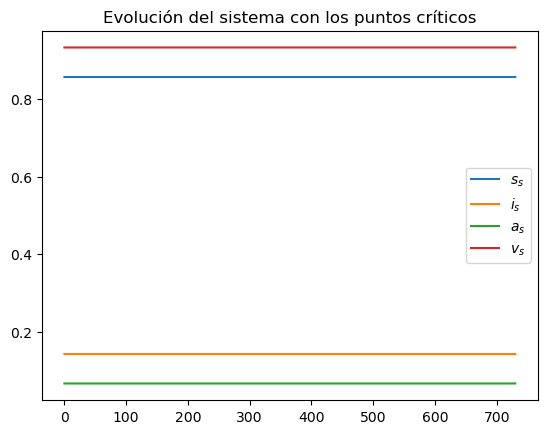

In [7]:
plt.title("Evolución del sistema con los puntos críticos")
plt.plot(ts, s_s, label="$s_s$")
plt.plot(ts, i_s, label="$i_s$")
plt.plot(ts, a_s, label="$a_s$")
plt.plot(ts, v_s, label='$v_s$')
plt.legend()
plt.show()

In [8]:
D_h = ((4 * 7) + (2 * 7)) / 2
gamma_h = 1 / D_h

D_m = 14
gamma_m = 1 / D_m

beta_h = 0.1 # tasa de contagio para humanos
beta_m = 0.1 # tasa de contagio para mosquitos


ts = np.arange(0, 10 * 365, 0.01)

i_s = [i]
a_s = [a]

s_s, i_s, v_s, a_s = euler(ts, i_s, a_s)

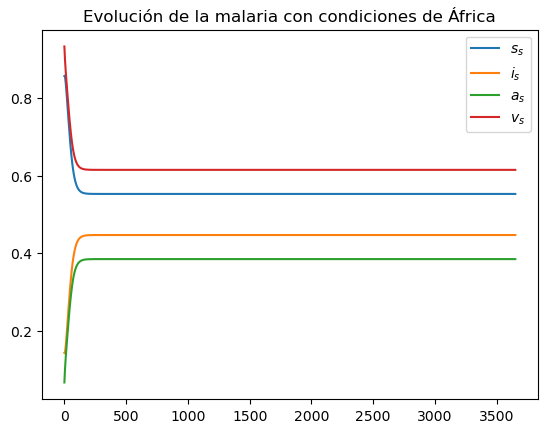

In [9]:
plt.title("Evolución de la malaria con condiciones de África")
plt.plot(ts, s_s, label="$s_s$")
plt.plot(ts, i_s, label="$i_s$")
plt.plot(ts, a_s, label="$a_s$")
plt.plot(ts, v_s, label='$v_s$')
plt.legend()
plt.show()

# 5.
- Latencia en mosquitos
- Latencia en personas
- $\mu _v$


## Modelo matemático
### Humanos
$\frac{ds}{dt}=\gamma _h i - \beta _h a s - \mu _h s$

$\frac{de}{dt}=\beta _h a s - \sigma _h e - \mu _h e$

$\frac{di}{dt}=\sigma _h e - \gamma _h i - \mu _h i$

### Mosquitos
$\frac{dv}{dt}=\gamma _m a  - \beta _m i  v - \mu _m v$

$\frac{dl}{dt}=\beta _h i v - \sigma _m l - \mu _m l$

$\frac{da}{dt}=\sigma _m l - \gamma _m a - \mu _m a$

In [10]:
# Defino derivadas de Humanos
def ds_dt_seis(i, s, a, e):
	return gamma_h * i - beta_h * a * s - mu_h * s

def de_dt_seis(i, s, a, e):
	return beta_h * a * s - sigma_h * e - mu_h * e

def di_dt_seis(i, s, a, e):
	return  sigma_h * e - gamma_h * i - mu_h * i

# Defino derivadas de Mosquitos
def dv_dt_seis(v, a, i, e):
	return gamma_m * a - beta_m * i * v - mu_m * v

def dl_dt_seis(v, a, i, e):
	return beta_m * i * v - sigma_m * l - mu_m * l

def da_dt_seis(v, a, i, e):
	return  sigma_m * l - gamma_m * a - mu_m * a

def euler(ts, i_s, a_s, e_s, l_s):
	dt = ts[1] - ts[0]
	
	v_s = [1-a_s[0]-l_s[0]]
	s_s = [1-i_s[0]-e_s[0]]
	for i in range(len(ts[1:])):
		i = i_s[-1]
		a = a_s[-1]
		l = l_s[-1]
		e = e_s[-1]
		v = v_s[-1]
		s = s_s[-1]
		a_s.append(a + dt * da_dt_seis(v, a, i, l))
		i_s.append(i + dt * di_dt_seis(i, s, a, e))
		l_s.append(l + dt * dl_dt_seis(v, a, i, e))
		e_s.append(e + dt * de_dt_seis(i, s, a, e))
		v_s.append(v + dt * dv_dt_seis(v, a, i, l))
		s_s.append(s + dt * ds_dt_seis(i, s, a, l))

	return s_s, i_s, v_s, a_s